(a) Data Exploration and preparation

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

In [2]:
# Load the dataset and perform initial data exploration.
train_data = pd.read_csv('Data/mnist_train.csv')

In [3]:
# Identify the number of unique classes.
classes_num = train_data['label'].nunique()
print('Number of classes: {}'.format(classes_num))

Number of classes: 10


In [4]:
# Identify the number of features.
print(len(train_data.columns.tolist()) - 1)

784


In [5]:
# Check for missing values.
print(train_data.isnull().sum().sum())

0


In [6]:
# Normalize each image by dividing each pixel by 255.
train_data.iloc[:, 1:] = train_data.drop('label', axis=1) / 255.0

In [7]:
X = train_data.drop('label', axis=1)
y = train_data['label']

Resize images to dimensions of 28 by 28. After resizing, visualize some
images to verify the correctness of the reshaping process.

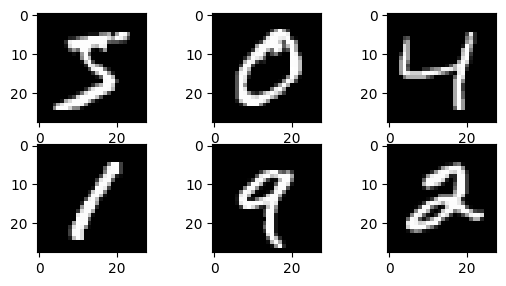

In [8]:
grid = X[: 6].values.reshape(6, 28, 28)
for i in range(6):
    plt.subplot(330 + 1 + i)
    plt.imshow(grid[i], cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
# Split the training data (mnist_train) into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



Initial Experiment:
Implement the K-NN algorithm for classification
and utilize a grid search technique
to determine the optimal hyper parameters.


In [24]:
knn_model = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': [5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    # 'metric': ['euclidean', 'manhattan'],
    # 'algorithm' : ['brute', 'kd_tree'],
    # 'leaf_size': np.arange(25, 35, 5)
}

knn_grid = GridSearchCV(knn_model, knn_parameters, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

In [25]:
knn_best_params = knn_grid.fit(X_train, y_train)

knn_model = knn_grid.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [26]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [27]:
knn_pred = knn_model.predict(X_test)

In [31]:
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_accuracy = round(knn_accuracy, 4) * 100

print(f"Accuracy of the model is: {knn_accuracy}%")

Accuracy of the model is: 97.22%


In [33]:
ann_y_train = keras.utils.to_categorical(y_train, classes_num)
ann_y_test = keras.utils.to_categorical(y_test, classes_num)

Subsequent Experiment: Construct and train two different architectures
of Artificial Neural Network (ANN) for classification, exploring variations in
the number of hidden neurons, learning rate, and batch size.

In [34]:
# model 1 (architecture 1)
# Create a model with 1 hidden layers with 128 neurons each.
ann_first_arch = models.Sequential()

# Add the input layer
ann_first_arch.add(layers.Flatten())

# Add the first hidden layer.
ann_first_arch.add(layers.Dense(128, activation='tanh'))

# Add the output layer.
ann_first_arch.add(layers.Dense(classes_num, activation='softmax'))

In [35]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.01)
ann_first_arch.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
ann_first_arch.fit(X_train, ann_y_train, epochs=50, batch_size=32, validation_data=(X_test, ann_y_test))

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.9146 - val_loss: 0.2347 - val_accuracy: 0.9317
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2095 - accuracy: 0.9374 - val_loss: 0.2186 - val_accuracy: 0.9362
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1940 - accuracy: 0.9424 - val_loss: 0.2067 - val_accuracy: 0.9430
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1819 - accuracy: 0.9469 - val_loss: 0.2146 - val_accuracy: 0.9390
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1675 - accuracy: 0.9512 - val_loss: 0.2129 - val_accuracy: 0.9450
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1652 - accuracy: 0.9510 - val_loss: 0.2265 - val_accuracy: 0.9423
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1630 - accuracy: 0.9539 - val_loss: 0.2091 - val_accuracy:

In [37]:
ann_first_arch_pred = ann_first_arch.predict(X_test)

375/375 [==============================] - 1s 2ms/step


In [38]:
ann_first_arch_pred = tf.argmax(ann_first_arch_pred, axis=1)

ann_first_arch_accuracy = accuracy_score(y_test, ann_first_arch_pred ) * 100
ann_first_arch_accuracy = round(ann_first_arch_accuracy, 4)

print(f"Accuracy of the model is: {ann_first_arch_accuracy}%")

Accuracy of the model is: 96.2%


In [39]:
# model 2 (architecture 2)
# Create a model with 3 hidden layers
ann_second_arch = models.Sequential()

# Add the input layer
ann_second_arch.add(layers.Flatten())

# Add the first hidden layer. with 64 neurons
ann_second_arch.add(layers.Dense(64, activation='relu'))

# Add the second hidden layer. with 128 neurons
ann_second_arch.add(layers.Dense(128, activation='relu'))

# Add the third hidden layer. with 64 neurons
ann_second_arch.add(layers.Dense(64, activation='relu'))

# Add the output layer.
ann_second_arch.add(layers.Dense(classes_num, activation='sigmoid'))

In [40]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.03)
ann_second_arch.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
ann_second_arch.fit(X_train, ann_y_train, epochs=100, batch_size=64, validation_data=(X_test, ann_y_test))

Epoch 1/100
750/750 [==============================] - 4s 4ms/step - loss: 0.6682 - accuracy: 0.8118 - val_loss: 0.3236 - val_accuracy: 0.9071
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2672 - accuracy: 0.9226 - val_loss: 0.2441 - val_accuracy: 0.9298
Epoch 3/100
750/750 [==============================] - 3s 3ms/step - loss: 0.2082 - accuracy: 0.9398 - val_loss: 0.2038 - val_accuracy: 0.9412
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.1756 - accuracy: 0.9478 - val_loss: 0.1841 - val_accuracy: 0.9477
Epoch 5/100
750/750 [==============================] - 3s 3ms/step - loss: 0.1520 - accuracy: 0.9551 - val_loss: 0.1728 - val_accuracy: 0.9497
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 0.1345 - accuracy: 0.9602 - val_loss: 0.1613 - val_accuracy: 0.9537
Epoch 7/100
750/750 [==============================] - 3s 4ms/step - loss: 0.1203 - accuracy: 0.9644 - val_loss: 0.1557 - val_accuracy: 0.9552

In [42]:
ann_second_arch_pred = ann_second_arch.predict(X_test)

375/375 [==============================] - 1s 2ms/step


In [43]:
ann_second_arch_pred = tf.argmax(ann_second_arch_pred, axis=1)

ann_second_arch_accuracy = accuracy_score(y_test, ann_second_arch_pred ) * 100
ann_second_arch_accuracy = round(ann_second_arch_accuracy, 4)

print(f"Accuracy of the model is: {ann_second_arch_accuracy}%")

Accuracy of the model is: 93.4167%


Compare the outcomes of the first and second experiments, discerning
which approach yields the highest accuracy on the validation dataset.


In [44]:
best_model_tuple = max(
                    (ann_first_arch, ann_first_arch_accuracy, ann_first_arch_pred.numpy().tolist(), "ann_first_arch"),
                    (ann_second_arch, ann_second_arch_accuracy, ann_second_arch_pred.numpy().tolist(), "ann_second_arch"),
                    (knn_model, knn_accuracy, knn_pred.tolist(), "knn"),
                    key=lambda item: item[1]
                )
best_model, best_model_accuracy, best_model_pred, best_model_name = best_model_tuple

In [45]:
# Get the confusion matrix of the best model.

print("Best model name is: ", best_model_name)
print(f"Best model accuracy is: {best_model_accuracy}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, best_model_pred))

Best model name is:  knn
Best model accuracy is: 97.22%
Confusion Matrix: 
 [[1144    0    1    0    0    0    6    1    1    0]
 [   0 1373    2    1    0    0    1    3    1    0]
 [   4   12 1180    1    2    1    3   14    2    1]
 [   0    2    5 1177    0   13    0    8    6    6]
 [   1   11    0    0 1137    0    2    2    1   21]
 [   2    4    0   11    1 1000   17    2    3    7]
 [   3    0    0    0    1    5 1214    0    1    0]
 [   0   15    3    0    4    0    0 1199    1   12]
 [   3   16    2   14    2   13    6    4 1128   16]
 [   2    2    0    4   10    0    0   11    2 1114]]


In [46]:
# Save the best model.
if(best_model_name == 'knn'):
    from joblib import dump
    dump(best_model, 'best_model')
else:
    best_model.save('best_model')

In [47]:
del best_model

In [48]:
if(best_model_name == 'knn'):
    best_model = load('best_model')
else:
    best_model = keras.models.load_model('best_model')

print(best_model)

KNeighborsClassifier(weights='distance')


In [49]:
test_data = pd.read_csv('Data/mnist_test.csv')

In [50]:
# Normalize each image by dividing each pixel by 255.
test_data.iloc[:, 1:] = test_data.drop('label', axis=1) / 255.0

In [51]:
best_model_pred = best_model.predict(test_data.iloc[: , 1:])

In [52]:
if(best_model_name != 'knn'):
    best_model_pred = tf.argmax(best_model_pred, axis=1)

best_model_accuracy = accuracy_score(test_data['label'], best_model_pred)
best_model_accuracy = round(best_model_accuracy, 2) * 100

print(f"Accuracy of the best model is: {best_model_accuracy}%")

Accuracy of the best model is: 97.0%
